In [1]:
%matplotlib inline 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import summary_table
from sklearn.preprocessing import PolynomialFeatures
from statsmodels.stats.outliers_influence import summary_table

In [2]:
Base_de_Datos= pd.read_excel('tarea_regiones.xlsx')
Datos=pd.DataFrame(Base_de_Datos)
Datos.head(7)

,Salario,Gasto,Region
0,41480,8349,Oeste
1,33990,5020,Sur
2,30678,5710,Noroeste y Norte Centro
3,30168,3782,Noroeste y Norte Centro
4,29470,4669,Noroeste y Norte Centro
5,29132,3608,Oeste
6,27360,3982,Noroeste y Norte Centro


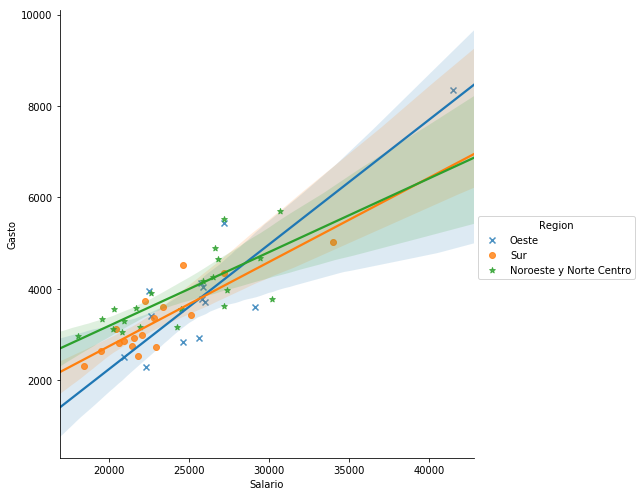

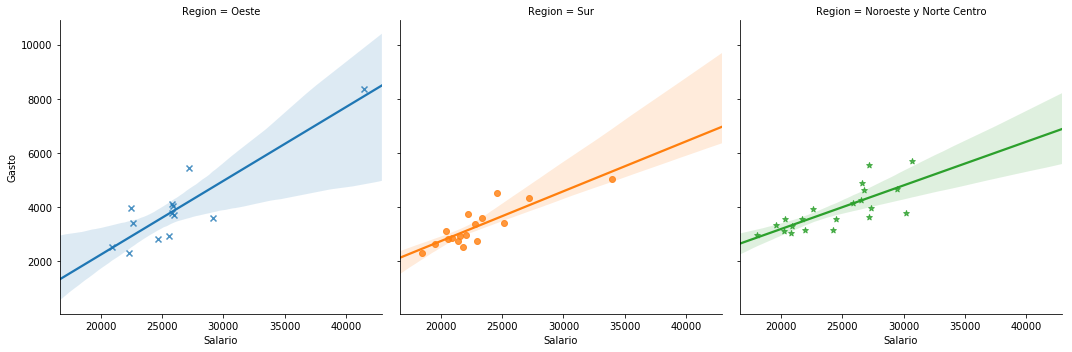

In [20]:
g = sns.lmplot(x="Salario", y="Gasto", hue="Region",data=Datos,markers=['x','o','*'],size=7)
h =  sns.lmplot(x="Salario", y="Gasto", col="Region",data=Datos,markers=['x','o','*'], hue="Region")

In [14]:
#convertir en dummy
df_x=Datos.drop("Gasto", axis=1)
df_x=pd.get_dummies(df_x)

In [15]:
df_x.head(7)

,Salario,Region_Noroeste y Norte Centro,Region_Oeste,Region_Sur
0,41480,0,1,0
1,33990,0,0,1
2,30678,1,0,0
3,30168,1,0,0
4,29470,1,0,0
5,29132,0,1,0
6,27360,1,0,0


In [16]:
x=df_x.values
y=Datos["Gasto"].values

In [17]:
model = ols("Gasto~Salario+Region", Datos).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Gasto   R-squared:                       0.720
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     40.31
Date:                Thu, 31 Oct 2019   Prob (F-statistic):           4.79e-13
Time:                        19:55:39   Log-Likelihood:                -394.40
No. Observations:                  51   AIC:                             796.8
Df Residuals:                      47   BIC:                             804.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -1262.2454    514.211     